In [17]:
from learningratefinder import LearningRateFinder

In [18]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
import os
import datetime

In [19]:
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda(
                                                                        training_sample_size=3500,
                                                                        test_sample_size=400,size=28)

In [20]:
x_train = np.array(x_train_original)
x_test = np.array(x_test_original)

In [21]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [22]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [23]:
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

In [24]:
x_val = x_test[:200]
x_test = x_test[200:]
y_val = y_test[:200]
y_test = y_test[200:]

In [25]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [26]:
MIN_LR = 1e-5
opt = tf.keras.optimizers.SGD(lr=MIN_LR, momentum=0.9)

In [27]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

Epoch 1/19
110/110 [==============================] - 2s 22ms/step - loss: 2.3210 - accuracy: 0.0811
Epoch 2/19
110/110 [==============================] - 2s 16ms/step - loss: 2.3181 - accuracy: 0.0783
Epoch 3/19
110/110 [==============================] - 2s 16ms/step - loss: 2.3245 - accuracy: 0.0746
Epoch 4/19
110/110 [==============================] - 2s 16ms/step - loss: 2.3215 - accuracy: 0.0743
Epoch 5/19
110/110 [==============================] - 2s 16ms/step - loss: 2.3191 - accuracy: 0.0806
Epoch 6/19
110/110 [==============================] - 2s 17ms/step - loss: 2.3196 - accuracy: 0.0789
Epoch 7/19
110/110 [==============================] - 2s 16ms/step - loss: 2.3166 - accuracy: 0.0869
Epoch 8/19
110/110 [==============================] - 2s 15ms/step - loss: 2.3189 - accuracy: 0.0814
Epoch 9/19
110/110 [==============================] - 2s 16ms/step - loss: 2.3198 - accuracy: 0.0917
Epoch 10/19
110/110 [==============================] - 2s 15ms/step - loss: 2.3177 - accura

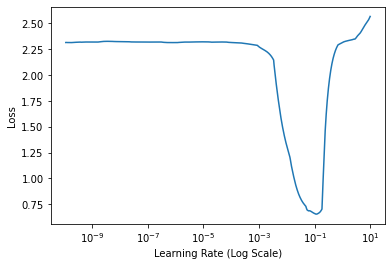

In [28]:
lrf = LearningRateFinder(model)
lrf.find((x_train, y_train),1e-10, 1e+1)
lrf.plot_loss()

In [ ]:
#so the best LR would be s.th between (10**-3) & (10**-1), (10**-2) could probably be a good choice.